<h1>UNAD - Universidad Nacional Abierta y a Distancia</h1>

<h3>Estudiante<br>
<b>Victor Javier Fortich Carabali</b><br>
Ingeniería de Sistemas</h3>

<p><h2><b>Regresión Logistica</b></h2>
<b>Vehicle dataset</b><br>
Contiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc. la variable objetivo es la presencia de enfermedad cardíaca.</p>

<br><b>Pasos de la Actividad</b><br>
<ol>
<li>Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</li>
<li>Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</li>
<li>Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características</li>
<li>Dividir el dataset en Train y Test para evaluar correctamente el modelo</li>
<li>Entrenar el modelo configurando los diferentes hiperparámetros</li>
<li>Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc</li>
<li>Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</li>
<li>Interpretar, analizar y documentar los resultados obtenidos</li>
<li>Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/</li>
</ol>
<p></p>

<h2> Desarrollo de la actividad</h2>

<h3><b>1. Realizaaar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</b></h3>

In [154]:
#Librerias
import pandas as pd                # Sirve para el manejo y análisis de estructuras de datos
import numpy as np                 # Sirve para cálcular el numérico y el análisis de datos
import seaborn as sns              # Sirve para la creación gráficos estadísticos
import matplotlib.pyplot as plt    # Sirve para la creación de gráficos en dos dimensiones

#Librerías - Modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [155]:
#Lectura de datos en Python y lo cargamos en la variable DatosRegresionLineal
DatosRegresionLogistica = pd.read_csv('./BD Regresion Logistica.csv')

In [156]:
#Se realiza la lectura de los Datos para el análisis exploratorio
DatosRegresionLogistica.head(20)

,Edad,Sexo,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol_Serico,Nivel_Azucar_Ayunas_Mayor_120mg,Resultados_Electrocardiogramas_Reposo,Frecuencia_Cardiaca_Maxima,Angina_Inducida,Depresion_Segmento,Pendiente_Segmento,Num_Vasos_Principales,Tipo_Defecto_Talasemia,Condicion_Enfermedad_Cardiaca
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [157]:
#Descripción del archivo
DatosRegresionLogistica.describe()

,Edad,Sexo,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol_Serico,Nivel_Azucar_Ayunas_Mayor_120mg,Resultados_Electrocardiogramas_Reposo,Frecuencia_Cardiaca_Maxima,Angina_Inducida,Depresion_Segmento,Pendiente_Segmento,Num_Vasos_Principales,Tipo_Defecto_Talasemia,Condicion_Enfermedad_Cardiaca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [158]:
#Descripción del archivo
DatosRegresionLogistica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Edad                                   297 non-null    int64  
 1   Sexo                                   297 non-null    int64  
 2   Tipo_Dolor_Pecho                       297 non-null    int64  
 3   Presion_Arterial_Reposo                297 non-null    int64  
 4   Colesterol_Serico                      297 non-null    int64  
 5   Nivel_Azucar_Ayunas_Mayor_120mg        297 non-null    int64  
 6   Resultados_Electrocardiogramas_Reposo  297 non-null    int64  
 7   Frecuencia_Cardiaca_Maxima             297 non-null    int64  
 8   Angina_Inducida                        297 non-null    int64  
 9   Depresion_Segmento                     297 non-null    float64
 10  Pendiente_Segmento                     297 non-null    int64  
 11  Num_Va

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Frecuencia Cardiaca')

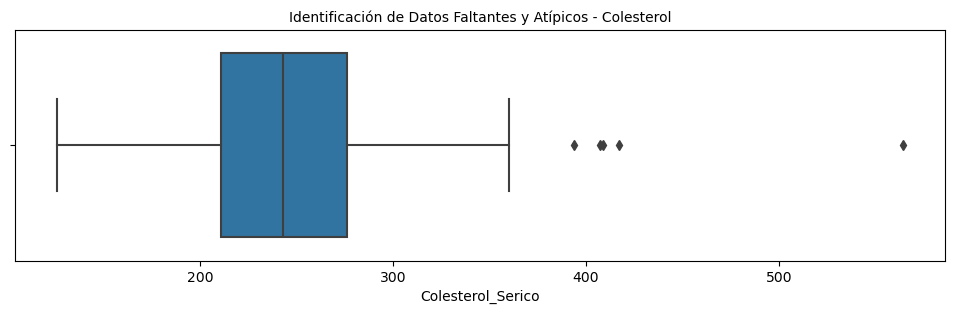

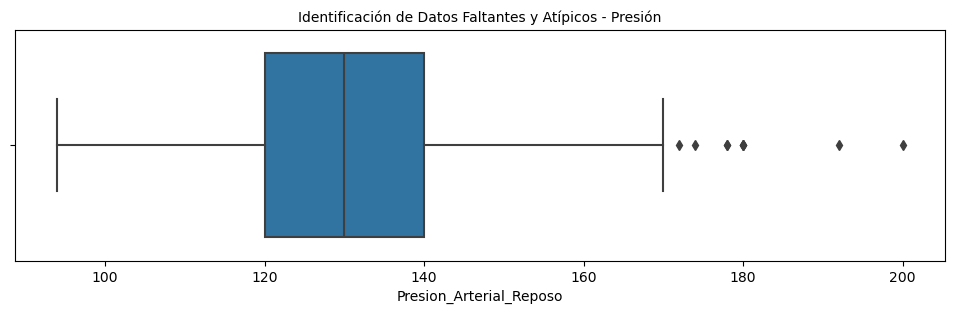

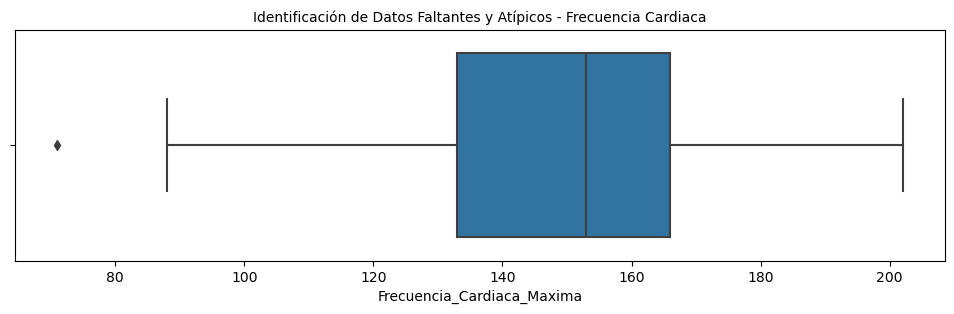

In [159]:
#Identificación de los Datos faltantes y los atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Colesterol_Serico'])
plt.title('Identificación de Datos Faltantes y Atípicos - Colesterol', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Presion_Arterial_Reposo'])
plt.title('Identificación de Datos Faltantes y Atípicos - Presión', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima'])
plt.title('Identificación de Datos Faltantes y Atípicos - Frecuencia Cardiaca', fontsize=10 )

<h3><b>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</b></h3>

In [160]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad:                                  ",DatosRegresionLogistica['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo:                                  ",DatosRegresionLogistica['Sexo'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo_Dolor_Pecho:                      ",DatosRegresionLogistica['Tipo_Dolor_Pecho'].isin([0]).sum())
print("Cantidad de Registros con cero en Presion_Arterial_Reposo:               ",DatosRegresionLogistica['Presion_Arterial_Reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol_Serico:                     ",DatosRegresionLogistica['Colesterol_Serico'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel_Azucar_Ayunas_Mayor_120mg:       ",DatosRegresionLogistica['Nivel_Azucar_Ayunas_Mayor_120mg'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultados_Electrocardiogramas_Reposo: ",DatosRegresionLogistica['Resultados_Electrocardiogramas_Reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia_Cardiaca_Maxima:            ",DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima'].isin([0]).sum())
print("Cantidad de Registros con cero en Angina_Inducida:                       ",DatosRegresionLogistica['Angina_Inducida'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresion_Segmento:                    ",DatosRegresionLogistica['Depresion_Segmento'].isin([0]).sum())
print("Cantidad de Registros con cero en Pendiente_Segmento:                    ",DatosRegresionLogistica['Pendiente_Segmento'].isin([0]).sum())
print("Cantidad de Registros con cero en Num_Vasos_Principales:                 ",DatosRegresionLogistica['Num_Vasos_Principales'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo_Defecto_Talasemia:                ",DatosRegresionLogistica['Tipo_Defecto_Talasemia'].isin([0]).sum())
print("Cantidad de Registros con cero en Condicion_Enfermedad_Cardiaca:         ",DatosRegresionLogistica['Condicion_Enfermedad_Cardiaca'].isin([0]).sum())

Cantidad de Registros con cero en Edad:                                   0
Cantidad de Registros con cero en Sexo:                                   96
Cantidad de Registros con cero en Tipo_Dolor_Pecho:                       23
Cantidad de Registros con cero en Presion_Arterial_Reposo:                0
Cantidad de Registros con cero en Colesterol_Serico:                      0
Cantidad de Registros con cero en Nivel_Azucar_Ayunas_Mayor_120mg:        254
Cantidad de Registros con cero en Resultados_Electrocardiogramas_Reposo:  147
Cantidad de Registros con cero en Frecuencia_Cardiaca_Maxima:             0
Cantidad de Registros con cero en Angina_Inducida:                        200
Cantidad de Registros con cero en Depresion_Segmento:                     96
Cantidad de Registros con cero en Pendiente_Segmento:                     139
Cantidad de Registros con cero en Num_Vasos_Principales:                  174
Cantidad de Registros con cero en Tipo_Defecto_Talasemia:                 1

In [161]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.
# No se realiza debido a que los valores son declarados binarios.

In [182]:
#procesar datos limpiandolos, tratando valores y Revisión de datos faltantes
print("Cantidad de Registros con cero en Sexo:                                  ",DatosRegresionLogistica['Sexo'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo_Dolor_Pecho:                      ",DatosRegresionLogistica['Tipo_Dolor_Pecho'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel_Azucar_Ayunas_Mayor_120mg:       ",DatosRegresionLogistica['Nivel_Azucar_Ayunas_Mayor_120mg'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultados_Electrocardiogramas_Reposo: ",DatosRegresionLogistica['Resultados_Electrocardiogramas_Reposo'].isin([0]).sum())
print("Cantidad de Registros con cero en Angina_Inducida:                       ",DatosRegresionLogistica['Angina_Inducida'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresion_Segmento:                    ",DatosRegresionLogistica['Depresion_Segmento'].isin([0]).sum())
print("Cantidad de Registros con cero en Pendiente_Segmento:                    ",DatosRegresionLogistica['Pendiente_Segmento'].isin([0]).sum())
print("Cantidad de Registros con cero en Num_Vasos_Principales:                 ",DatosRegresionLogistica['Num_Vasos_Principales'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo_Defecto_Talasemia:                ",DatosRegresionLogistica['Tipo_Defecto_Talasemia'].isin([0]).sum())
print("Cantidad de Registros con cero en Condicion_Enfermedad_Cardiaca:         ",DatosRegresionLogistica['Condicion_Enfermedad_Cardiaca'].isin([0]).sum())

Cantidad de Registros con cero en Sexo:                                   59
Cantidad de Registros con cero en Tipo_Dolor_Pecho:                       14
Cantidad de Registros con cero en Nivel_Azucar_Ayunas_Mayor_120mg:        141
Cantidad de Registros con cero en Resultados_Electrocardiogramas_Reposo:  77
Cantidad de Registros con cero en Angina_Inducida:                        112
Cantidad de Registros con cero en Depresion_Segmento:                     50
Cantidad de Registros con cero en Pendiente_Segmento:                     78
Cantidad de Registros con cero en Num_Vasos_Principales:                  89
Cantidad de Registros con cero en Tipo_Defecto_Talasemia:                 92
Cantidad de Registros con cero en Condicion_Enfermedad_Cardiaca:          85


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Frecuencia Cardiaca')

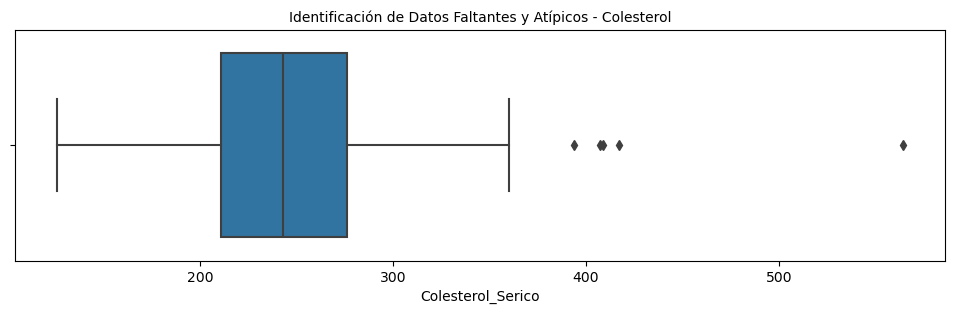

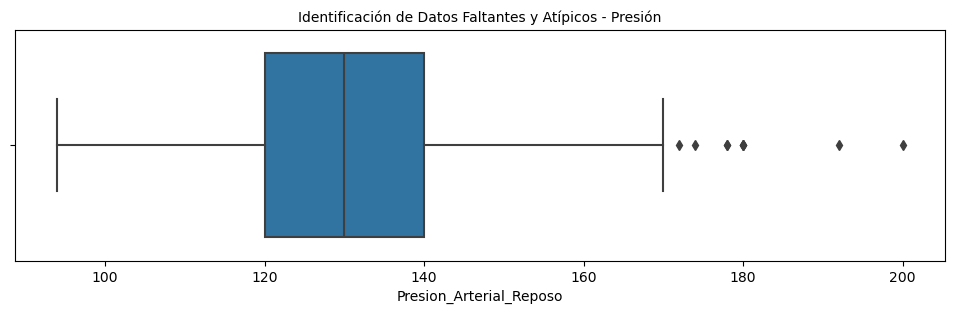

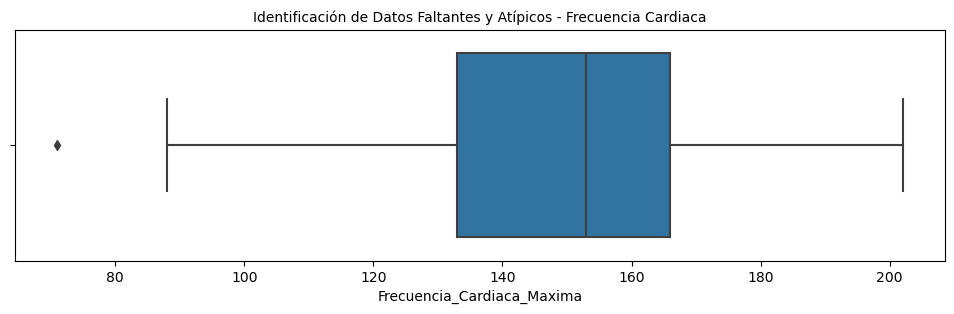

In [164]:
#Identificación de los datos atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Colesterol_Serico'])
plt.title('Identificación de Datos Faltantes y Atípicos - Colesterol', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Presion_Arterial_Reposo'])
plt.title('Identificación de Datos Faltantes y Atípicos - Presión', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima'])
plt.title('Identificación de Datos Faltantes y Atípicos - Frecuencia Cardiaca', fontsize=10 )

In [165]:
#Conteo de Datos Atípicos
Nivel_Minimo=120
Nivel_Maximo=170
Total_Atipicos=((DatosRegresionLogistica['Presion_Arterial_Reposo']<Nivel_Minimo)|(DatosRegresionLogistica['Presion_Arterial_Reposo']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Presion Arterial):       {}".format(Total_Atipicos))

El Total de los datos atípicos es (Presion Arterial):       69


In [166]:
#Conteo de Datos Atípicos
Minimo=100
Maximo=180
Total_Atipicos=((DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima']<Minimo)|(DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima']>Maximo)).sum()
print("El Total de los datos atipicos es (Frecuencia Cardiaca):    {}".format(Total_Atipicos))

El Total de los datos atipicos es (Frecuencia Cardiaca):    26


In [167]:
#Conteo de Datos Atípicos y se Filtra Datos Atípicos
DatosRegresionLogistica=DatosRegresionLogistica[(DatosRegresionLogistica['Presion_Arterial_Reposo']<Nivel_Maximo)&(DatosRegresionLogistica['Presion_Arterial_Reposo']>Nivel_Minimo)]

# Validar si se removieron los datos atípicos
Total_Atipicos=((DatosRegresionLogistica['Presion_Arterial_Reposo']<Nivel_Minimo)|(DatosRegresionLogistica['Presion_Arterial_Reposo']>Nivel_Maximo)).sum()
print("El Total de los datos atípicos es (Presion Arterial):       {}".format(Total_Atipicos))

El Total de los datos atípicos es (Presion Arterial):       0


In [168]:
#Conteo de Datos Atípicos y se Filtra Datos Atípicos
DatosRegresionLogistica=DatosRegresionLogistica[(DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima']<Maximo)&(DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima']>Minimo)]

# Validar si se removieron los datos atípicos
Total_Atipicos=((DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima']<Minimo)|(DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima']>Maximo)).sum()
print("El Total de los datos atipicos es (Frecuencia Cardiaca):    {}".format(Total_Atipicos))

El Total de los datos atipicos es (Frecuencia Cardiaca):    0


In [169]:
#Revisión del tipo de datos y datos faltantes
DatosRegresionLogistica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Edad                                   171 non-null    int64  
 1   Sexo                                   171 non-null    int64  
 2   Tipo_Dolor_Pecho                       171 non-null    int64  
 3   Presion_Arterial_Reposo                171 non-null    int64  
 4   Colesterol_Serico                      171 non-null    int64  
 5   Nivel_Azucar_Ayunas_Mayor_120mg        171 non-null    int64  
 6   Resultados_Electrocardiogramas_Reposo  171 non-null    int64  
 7   Frecuencia_Cardiaca_Maxima             171 non-null    int64  
 8   Angina_Inducida                        171 non-null    int64  
 9   Depresion_Segmento                     171 non-null    float64
 10  Pendiente_Segmento                     171 non-null    int64  
 11  Num_Vasos_P

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Frecuencia Cardiaca')

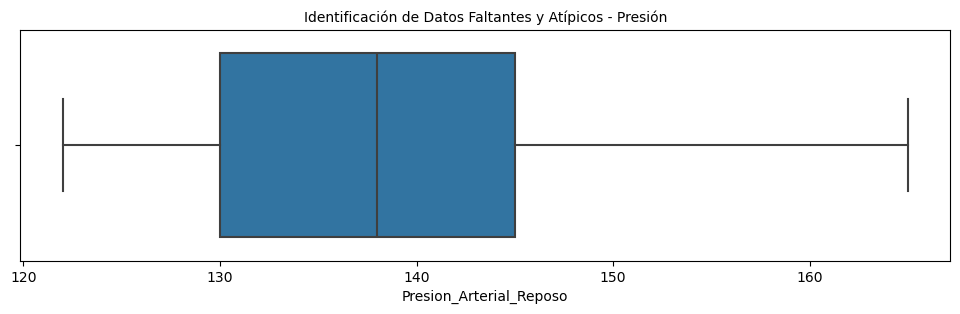

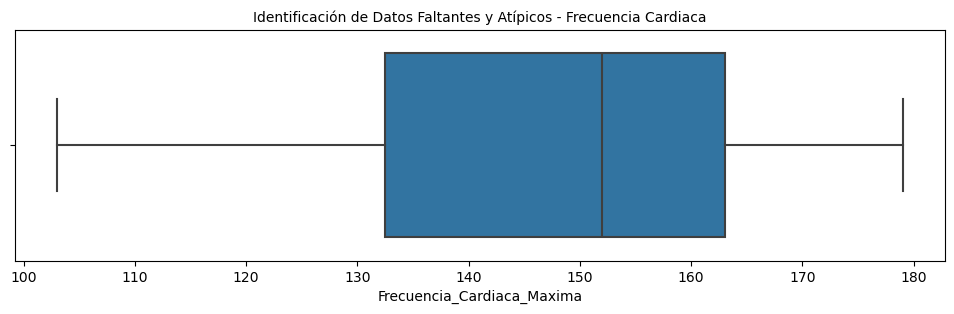

In [170]:
#Identificación de los datos atípicos
plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Presion_Arterial_Reposo'])
plt.title('Identificación de Datos Faltantes y Atípicos - Presión', fontsize=10 )

plt.figure(figsize=(12, 3))
sns.boxplot(x=DatosRegresionLogistica['Frecuencia_Cardiaca_Maxima'])
plt.title('Identificación de Datos Faltantes y Atípicos - Frecuencia Cardiaca', fontsize=10 )

<h3><b>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</b></h3>

In [171]:
# Total de personas con Enfermedad Cardiaca
DatosRegresionLogistica['Condicion_Enfermedad_Cardiaca'].value_counts()

Condicion_Enfermedad_Cardiaca
1    86
0    85
Name: count, dtype: int64

In [172]:
# Impresion de los primeros elementos en la dataset
DatosRegresionLogistica[['Condicion_Enfermedad_Cardiaca']].head(40)

,Condicion_Enfermedad_Cardiaca
0,0
1,0
2,0
3,1
6,0
7,1
8,0
11,1
12,1
13,0


<h3><b>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.</b></h3>

In [173]:
# Porcentaje de datos para entrenamiento (Train)=75% , y para Prueba (Test)=25%

X = DatosRegresionLogistica.drop('Condicion_Enfermedad_Cardiaca',axis=1)
Y = DatosRegresionLogistica['Condicion_Enfermedad_Cardiaca']

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [174]:
# Impresión de la variable independiente de entrenamiento
print (X_train)

     Edad  Sexo  Tipo_Dolor_Pecho  Presion_Arterial_Reposo  Colesterol_Serico  \
82     66     0                 2                      146                278   
114    53     1                 2                      130                197   
69     35     1                 1                      122                192   
170    65     0                 3                      150                225   
25     70     1                 1                      156                245   
..    ...   ...               ...                      ...                ...   
189    62     0                 3                      138                294   
34     57     1                 1                      124                261   
7      61     1                 0                      134                234   
103    57     1                 2                      128                229   
195    61     0                 3                      130                330   

     Nivel_Azucar_Ayunas_Ma

In [175]:
# Impresion de la variable dependiente de entrenamiento
print (Y_train)

82     0
114    0
69     0
170    1
25     0
      ..
189    1
34     1
7      1
103    1
195    1
Name: Condicion_Enfermedad_Cardiaca, Length: 128, dtype: int64


<h3><b>5. Entrenar el modelo configurando los diferentes hiperparámetros.</b></h3>

In [176]:
# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train) 

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [177]:
# imprimir la vairable de prueba
print (Y_test)

150    0
11     1
58     0
276    0
184    1
196    1
20     0
263    1
186    1
147    0
285    0
136    1
191    0
89     0
288    1
134    0
229    1
254    0
27     0
202    1
107    0
244    1
88     0
225    1
111    0
155    1
113    0
205    1
185    1
47     0
258    1
197    1
158    1
92     0
44     0
236    1
75     1
12     1
272    0
200    1
115    0
3      1
176    0
Name: Condicion_Enfermedad_Cardiaca, dtype: int64


In [178]:
# Impresion de la predicción del modelo de logistica
print ( "EL modelo de predicción: ")
print (Prediccion)

EL modelo de predicción: 
[0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1
 0 0 1 1 0 1]


<h3><b>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.</b></h3>

In [179]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.81      0.77      0.79        22

    accuracy                           0.79        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.79      0.79      0.79        43



<h3><b>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</b></h3>

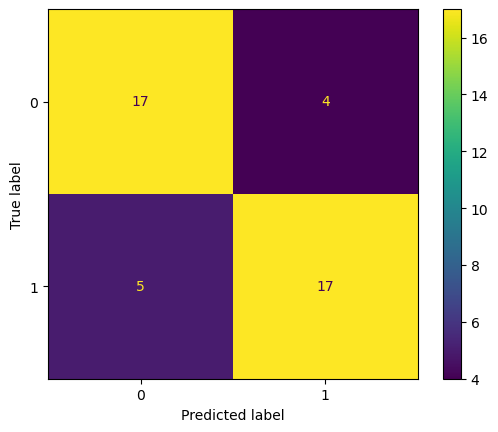

In [180]:
#Matrix de Confusión del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

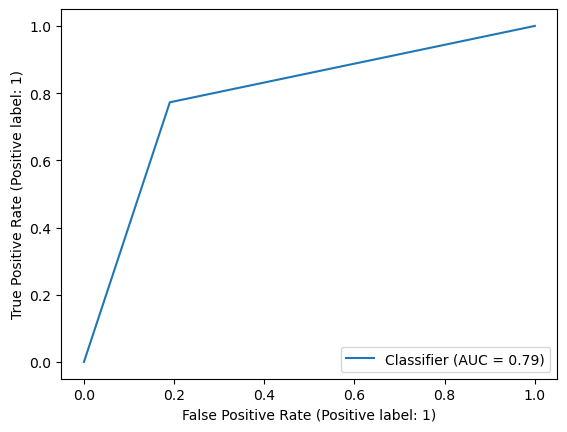

In [181]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

<h3><b>8. Interpretar, analizar y documentar los resultados obtenidos.</b></h3>

<b>Del desempeño del modelo se puede describir</b>:
<ol>
<li>Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Enfermedad Cardiaca" es 0,79, lo que significa que el 79% de los predichos como problemas cardiacos por el modelo.</li>
<li>Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "diabético" es 0,79, obteniendo como resultado (0 81% y para 1 77%), lo que indica que el modelo identificó correctamente al 79% de todos los cardiacos.</li>
<li>F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "cardiacos" es 79% obteniendo como resultado (0 79% y para 1 79%), lo que indica un equilibrio entre precisión y recuerdo.</li>
</ol>

<b>De la Matriz de confusión se puede interpretar</b>:
<ol>
<li>Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 17</li>
<li>Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 17</li> 
<li>Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 4</li>
<li>Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 5</li>
</ol>

<b>De la curva de precisión del modelo se puede interpretar:<b><ol>
<li>El AUC es 0,79 lo que significa que el 79% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.
</li>
</ol> lso 31
rdo.